In [40]:
import pandas as pd
import psycopg2
from config import config
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import datetime

params = config()

conn = psycopg2.connect(**params)
conn.autocommit = True
cursor = conn.cursor()

weather_df_all = sqlio.read_sql_query("SELECT * FROM WEATHER_DETAILS4 order by timestamp asc", conn)

cursor.close()
conn.close()

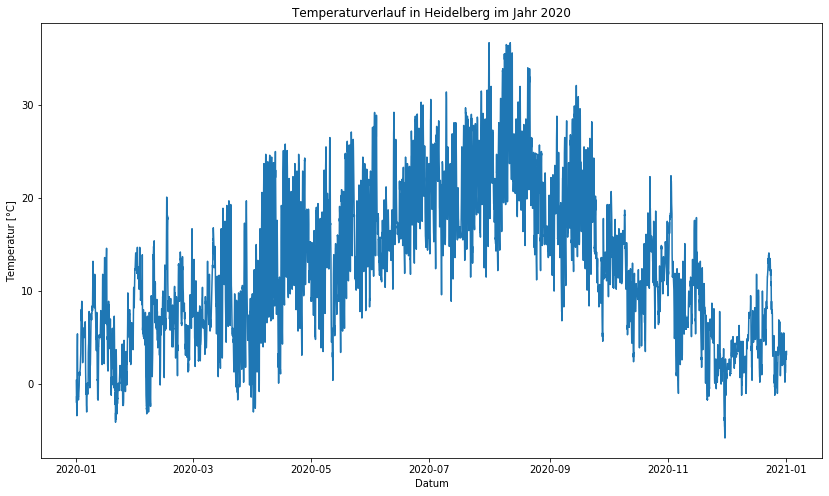

In [42]:
plt.figure(figsize = (14,8))
plt.plot(weather_df_all[['timestamp']][(weather_df_all['timestamp'] > '2020-01-01 00:00:00') & (weather_df_all['timestamp'] < '2021-01-01 02:00:00')]['timestamp'], weather_df_all[['temperature']][(weather_df_all['timestamp'] > '2020-01-01 00:00:00') & (weather_df_all['timestamp'] < '2021-01-01 02:00:00')])

plt.xlabel('Datum')
plt.ylabel('Temperatur [°C]')
plt.title('Temperaturverlauf in Heidelberg im Jahr 2020')
pass

In [45]:
ser_diff = weather_df_all['timestamp'].diff()

In [46]:
ser_diff[ser_diff != datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=1, weeks=0)]

0            NaT
1       00:00:00
3       00:00:00
5       00:00:00
7       00:00:00
          ...   
9353    00:00:00
11466   02:00:00
16506   00:00:00
20202   02:00:00
25410   00:00:00
Name: timestamp, Length: 135, dtype: timedelta64[ns]

In [35]:
weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2011-01-01 00:00:00') & (weather_df_all['timestamp'] < '2022-01-01 00:00:00')].mean()

temperature    11.801285
dtype: float64

No handles with labels found to put in legend.


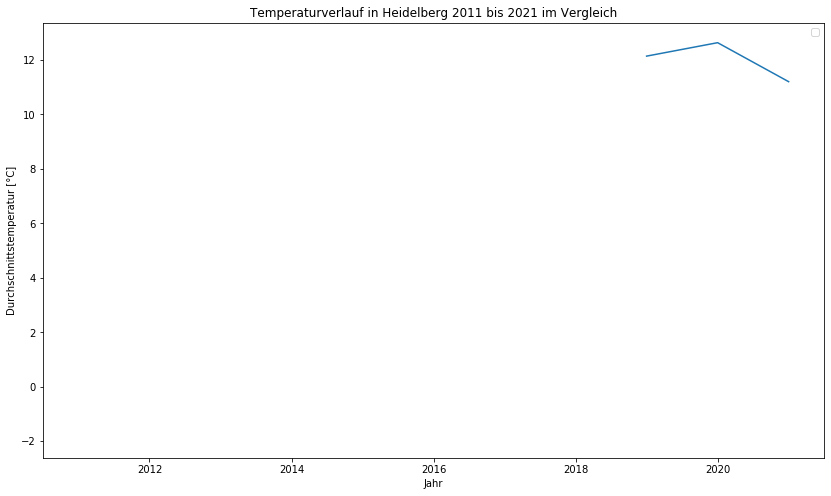

In [36]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
mean_temps = [weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2011-01-01 00:00:00') & (weather_df_all['timestamp'] < '2012-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2012-01-01 00:00:00') & (weather_df_all['timestamp'] < '2013-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2013-01-01 00:00:00') & (weather_df_all['timestamp'] < '2014-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2014-01-01 00:00:00') & (weather_df_all['timestamp'] < '2015-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2015-01-01 00:00:00') & (weather_df_all['timestamp'] < '2016-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2016-01-01 00:00:00') & (weather_df_all['timestamp'] < '2017-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2017-01-01 00:00:00') & (weather_df_all['timestamp'] < '2018-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2018-01-01 00:00:00') & (weather_df_all['timestamp'] < '2019-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2019-01-01 00:00:00') & (weather_df_all['timestamp'] < '2020-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2020-01-01 00:00:00') & (weather_df_all['timestamp'] < '2021-01-01 00:00:00')].mean(), weather_df_all[[ 'temperature']][(weather_df_all['timestamp'] > '2021-01-01 00:00:00') & (weather_df_all['timestamp'] < '2022-01-01 00:00:00')].mean()]
plt.figure(figsize = (14,8))
plt.plot(years, mean_temps)

plt.legend()
plt.xlabel('Jahr')
plt.ylabel('Durchschnittstemperatur [°C]')
plt.title('Temperaturverlauf in Heidelberg 2011 bis 2021 im Vergleich')
pass

In [37]:
mean_temps

[temperature   -1.88374
 dtype: float64, temperature   NaN
 dtype: float64, temperature    5.674194
 dtype: float64, temperature   NaN
 dtype: float64, temperature    0.934459
 dtype: float64, temperature   NaN
 dtype: float64, temperature   -0.733784
 dtype: float64, temperature   NaN
 dtype: float64, temperature    12.139
 dtype: float64, temperature    12.632377
 dtype: float64, temperature    11.200617
 dtype: float64]